# Lab 03: Loss and Error Rate - Demo

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data/mnist"

train_data = torch.load(data_path + "/train_data.pt")
train_label = torch.load(data_path + "/train_label.pt")
test_data = torch.load(data_path + "/test_data.pt")
test_label = torch.load(data_path + "/test_label.pt")

### Make a ONE layer net class

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [4]:
net = one_layer_net(784, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [12]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

bs = 200

### Do 30 passes through the training set

In [16]:
for epoch in range(30):
    
    running_loss = 0.0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for i in range(0, 60000, bs):
        
        optimizer.zero_grad()
        
        indices = shuffled_indices[i : i+bs]
        minibatch_data = train_data[indices]
        minibatch_labels = train_label[indices]
        
        inputs = minibatch_data.view(bs, 784)
        inputs.requires_grad_()
        
        scores = net(inputs)
        loss = criterion(scores, minibatch_labels)
        loss.backward()
        optimizer.step()
        
        # compute and accumulate stats
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_labels)
        running_error += error.item()
        num_batches += 1
        
    # compute stats for the full training set
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    
    print('epoch=', epoch, '\t loss=', total_loss, '\t error=', total_error*100,'%')

epoch= 0 	 loss= 0.6333854047457377 	 error= 14.343333264191946 %
epoch= 1 	 loss= 0.6260395368933678 	 error= 14.219999810059866 %
epoch= 2 	 loss= 0.6190707616011302 	 error= 14.166666467984518 %
epoch= 3 	 loss= 0.6124494745333989 	 error= 14.069999913374584 %
epoch= 4 	 loss= 0.6061556928356489 	 error= 13.988333205382029 %
epoch= 5 	 loss= 0.60015865812699 	 error= 13.92666643857956 %
epoch= 6 	 loss= 0.5944357858101527 	 error= 13.858333190282185 %
epoch= 7 	 loss= 0.5889709513386091 	 error= 13.783333162466684 %
epoch= 8 	 loss= 0.5837450153628985 	 error= 13.73499983549118 %
epoch= 9 	 loss= 0.5787398808201154 	 error= 13.660000026226044 %
epoch= 10 	 loss= 0.573942714035511 	 error= 13.594999929269155 %
epoch= 11 	 loss= 0.569340049525102 	 error= 13.534999827543896 %
epoch= 12 	 loss= 0.5649199258287748 	 error= 13.490000009536743 %
epoch= 13 	 loss= 0.5606681993603706 	 error= 13.418333331743876 %
epoch= 14 	 loss= 0.556577935218811 	 error= 13.366666535536448 %
epoch= 15 	 

### Choose image at random from the test set and see how good/bad are the predictions

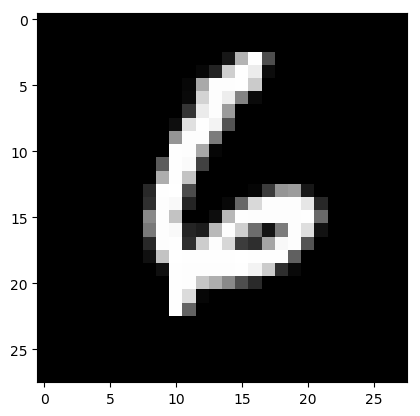

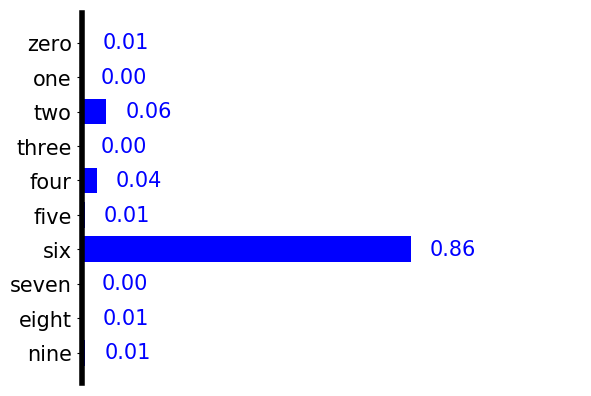

In [18]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)